In [18]:
import tensorflow_decision_forests as tfdf
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [19]:
# Load a dataset into a Pandas Dataframe.
df = pd.read_csv("FertilizerPrediction.csv")

# Rename the column 'Fertilizer Name' to 'New Column Name'
df = df.rename(columns={'Temparature': 'temparature', 'Humidity ': 'humidity', 'Moisture': 'moisture', 'Soil Type': 'soil_type' , 'Crop Type': 'crop_type', 'Nitrogen': 'nitrogen', 'Potassium' : 'potassium', 'Phosphorous': 'phosphorous','Fertilizer Name': 'fertilizer'})

# Display the first 3 examples.
df.head(3)

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14


In [20]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "fertilizer"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)
df.head(3)

Label classes: ['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20', '10-26-26']


,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer
0,26,52,38,Sandy,Maize,37,0,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36,1
2,34,65,62,Black,Cotton,7,9,30,2


In [21]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

75 examples in training, 24 examples for testing.


In [22]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [23]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 12 thread(s) for training
Use /tmp/tmp9pb1erig as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'temparature': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'humidity': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'moisture': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'soil_type': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'crop_type': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'nitrogen': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'potassium': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'phosphorous': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>}
Label: Tensor("data_8:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'temparature': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'humidity': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'moist

2023-05-31 11:04:03.761660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int64 and shape [75]
	 [[{{node Placeholder/_8}}]]


Training dataset read in 0:00:00.385433. Found 75 examples.
Training model...


[INFO 23-05-31 11:04:04.1501 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-31 11:04:04.1501 UTC kernel.cc:774] Collect training examples
[INFO 23-05-31 11:04:04.1502 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-31 11:04:04.1507 UTC kernel.cc:393] Number of batches: 1
[INFO 23-05-31 11:04:04.1507 UTC kernel.cc:394] Number of examples: 75
[INFO 23-05-31 11:04:04.1508 UTC data_spec_inference.cc:305] 3 item(s) have been pruned (i.e. they are considered out of dictionary) for the column crop_type (8 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-05-31 11:04:04.1509 UTC kernel.cc:794] T

[INFO 23-05-31 11:04:04.1780 UTC kernel.cc:926] Export model in log directory: /tmp/tmp9pb1erig with prefix bff8c2b8ba8d453c
[INFO 23-05-31 11:04:04.1855 UTC kernel.cc:944] Save model in resources
[INFO 23-05-31 11:04:04.1890 UTC abstract_model.cc:849] Model self evaluation:
Number of predictions (without weights): 75
Number of predictions (with weights): 75
Task: CLASSIFICATION
Label: __LABEL

Accuracy: 0.946667  CI95[W][0.8821 0.98158]
LogLoss: : 0.282142
ErrorRate: : 0.0533333

Default Accuracy: : 0.253333
Default LogLoss: : 1.84171
Default ErrorRate: : 0.746667

Confusion Table:
truth\prediction
   0   1   2  3   4  5  6  7
0  0   0   0  0   0  0  0  0
1  0  19   0  0   0  0  0  0
2  0   0  14  0   0  0  0  0
3  0   0   0  9   0  0  0  0
4  0   0   0  0  14  0  0  0
5  0   0   0  0   0  6  0  0
6  0   0   0  0   0  0  9  0
7  0   0   0  3   0  1  0  0
Total: 75

One vs other classes:

[INFO 23-05-31 11:04:04.2103 UTC kernel.cc:1242] Loading model from path /tmp/tmp9pb1erig/model/ w

Model trained in 0:00:00.089680
Compiling model...


2023-05-31 11:04:04.240770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [75]
	 [[{{node Placeholder/_2}}]]


Model compiled.


In [24]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 208ms/step - loss: 0.0000e+00 - accuracy: 0.9583


2023-05-31 11:04:16.772374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype int64 and shape [24]
	 [[{{node Placeholder/_7}}]]



loss: 0.0000
accuracy: 0.9583


In [25]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=28, accuracy=0.7857142857142857, loss=7.723639624459403, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=71, accuracy=0.8309859154929577, loss=2.20933950702909, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=75, accuracy=0.88, loss=1.704164344072342, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=75, accuracy=0.8933333333333333, loss=1.2730623771746954, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=75, accuracy=0.9066666666666666, loss=0.3183428185184797, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=75, accuracy=0.9466666666666667, loss=0.2931139986217022, rmse=None, ndcg=None, aucs=None,

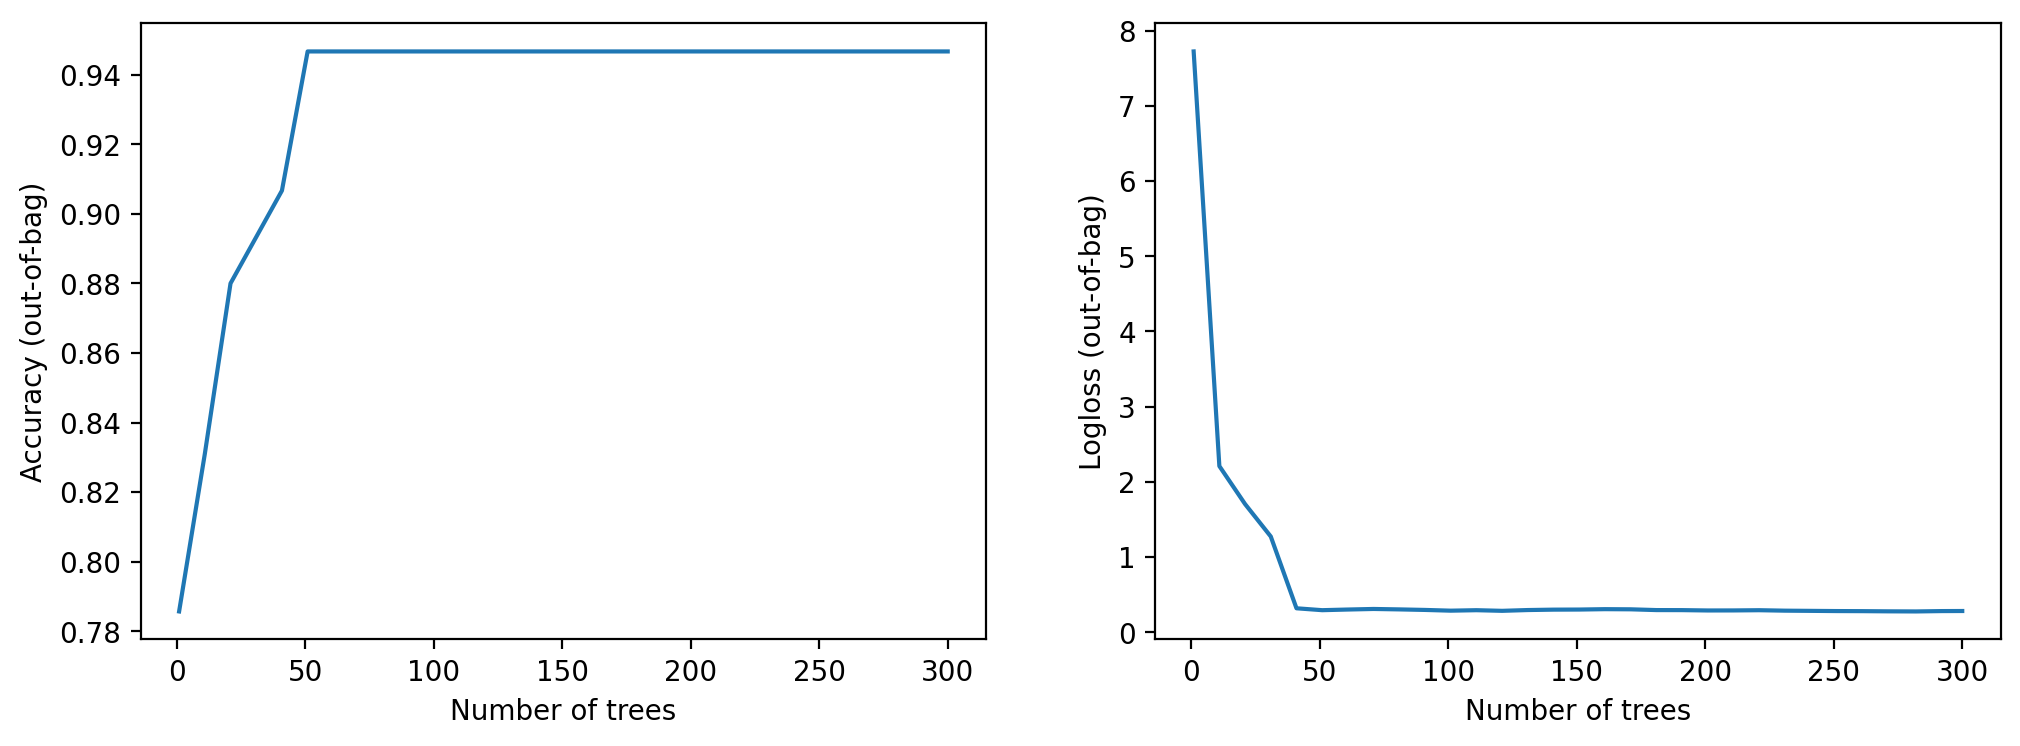

In [26]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [27]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [28]:
import dtreeviz

from matplotlib import pyplot as plt
from IPython import display

# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

display.set_matplotlib_formats('retina') # generate hires plots

np.random.seed(1234)  # reproducible plots/data for explanatory reasons

/tmp/ipykernel_82/1147675804.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


In [34]:
# Tell dtreeviz about training data and model
fertilizer_features = [f.name for f in model_1.make_inspector().features()]
viz_cmodel = dtreeviz.model(model_1,
                           tree_index=3,
                           X_train=train_ds_pd[fertilizer_features],
                           y_train=train_ds_pd[label],
                           feature_names=fertilizer_features,
                           target_name=label,
                           class_names=classes)

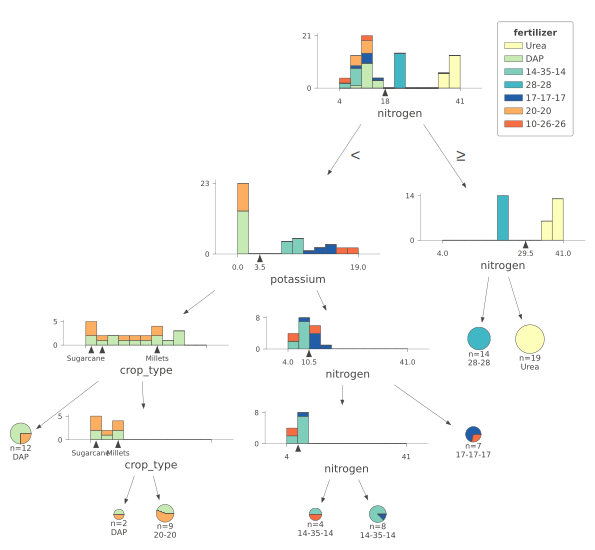

In [35]:
viz_cmodel.view(scale=1.2)

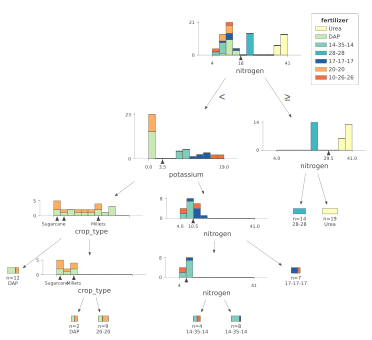

In [36]:
viz_cmodel.view(leaftype='barh', scale=.75)

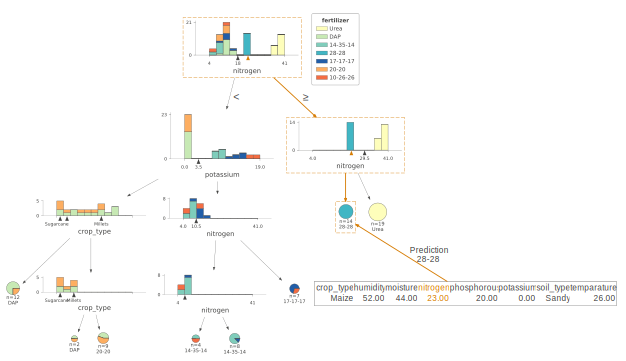

In [38]:
x = train_ds_pd[fertilizer_features].iloc[20]
viz_cmodel.view(x=x, scale=.75)